In [18]:
#import required analytics libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

# hog feature extraction library
from skimage.feature import hog

# Classification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
#read the dataset

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Information about the dataset

print(f"Size of training dataset is {train.shape}")
print(f"Size of testing dataset is {test.shape}")

Size of training dataset is (42000, 785)
Size of testing dataset is (28000, 784)


In [4]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## In the above dataset, 1st column is target/label data and the remaining onces are input data

In [5]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lests separate input data and target data

In [6]:
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [7]:
X.shape,y.shape

((42000, 784), (42000,))

### Since there are 784 flattened pixels, we can convert 1 d data into 2 dimensional picuture with shape (28,28)

In [8]:
int(np.sqrt(X.shape[1]))

28

### Lets visualize 1st 10 images

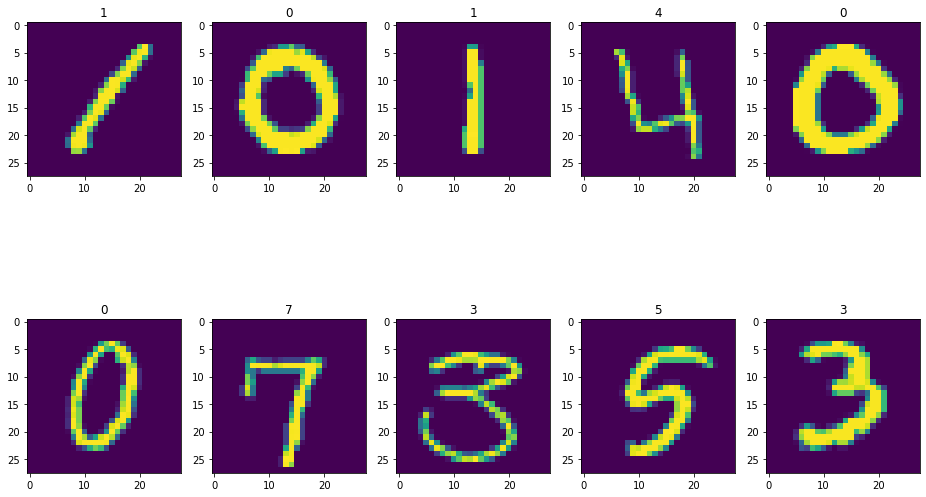

In [9]:
fig,ax=pl.subplots(2,5,figsize=(16,10))
axes=ax.ravel()
for i in range(10):
    temp=X.iloc[i,:]
    axes[i].set_title(y[i])
    temp=np.array(temp).reshape(28,28)
    axes[i].imshow(temp)
pl.show()

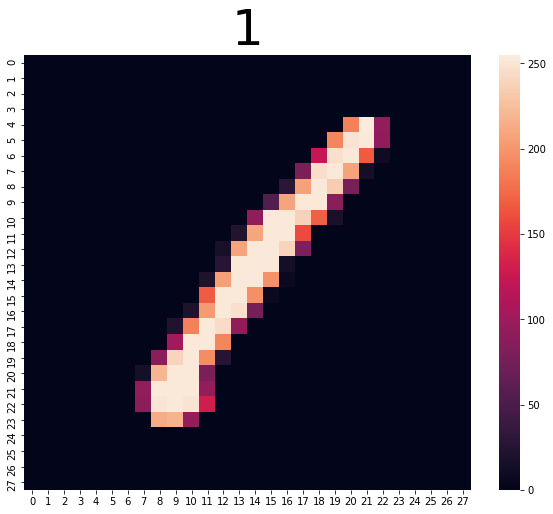

In [10]:
pl.figure(figsize=(10,8))
sns.heatmap(np.array(X.iloc[0,:]).reshape(28,28))
pl.title(y[0],size=50)
pl.show()

### number of available pixels in above image digit i.e 1

In [11]:
image=X.iloc[0,:]
print(f'There are {len(np.where(image!=0)[0])} pixels availble among {len(image)} pixels')
print('Therefore there are only 97 pixel features relavant to us')

There are 97 pixels availble among 784 pixels
Therefore there are only 97 pixel features relavant to us


### creating hog features of input data

### image before and after applying hog for digit 1


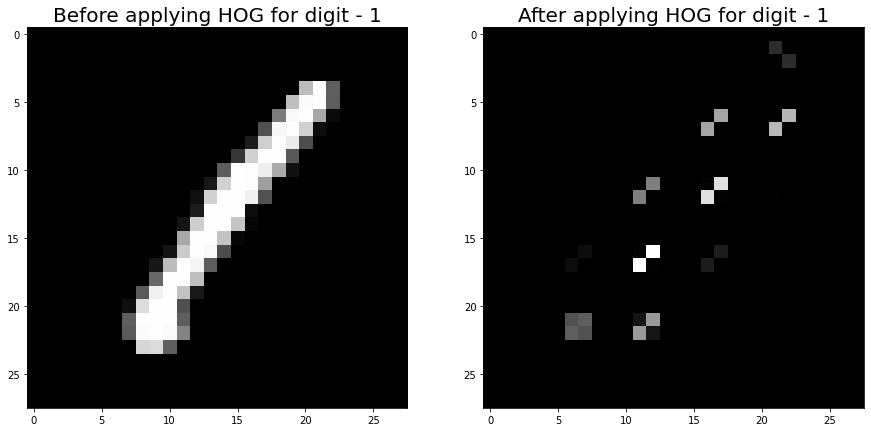

In [83]:
image=np.array(X.iloc[0,:]).reshape(28,28)

pl.figure(figsize=(15,8))
pl.subplot(1,2,2)
fd, hog_image = hog(image, orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)
pl.title(f"After applying HOG for digit - {y[0]}",size=20)
pl.imshow(hog_image,cmap='gray')


pl.subplot(1,2,1)
pl.title(f"Before applying HOG for digit - {y[0]}",size=20)
pl.imshow(image,cmap='gray')

pl.show()

### image before and after applying hog for digit 0


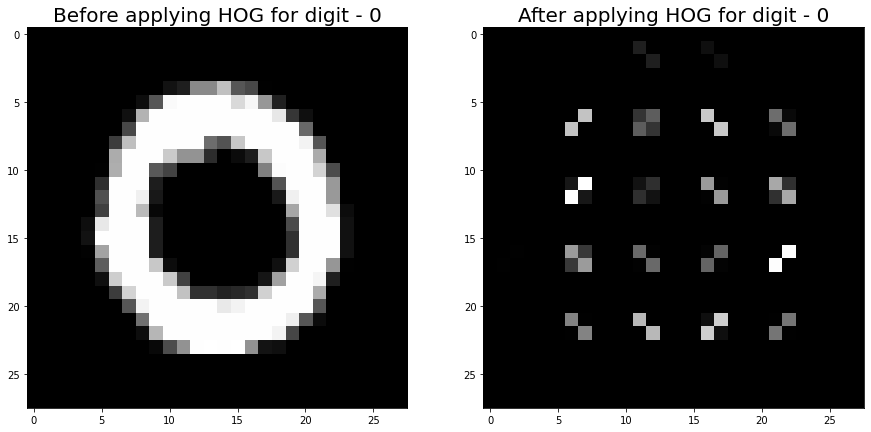

In [82]:
image=np.array(X.iloc[1,:]).reshape(28,28)

pl.figure(figsize=(15,8))
pl.subplot(1,2,2)
fd, hog_image = hog(image, orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)
pl.title(f"After applying HOG for digit - {y[1]}",size=20)
pl.imshow(hog_image,cmap='gray')


pl.subplot(1,2,1)
pl.title(f"Before applying HOG for digit - {y[1]}",size=20)
pl.imshow(image,cmap='gray')

pl.show()

In [ ]:
_, hog_image = hog(image, orientations=10, pixels_per_cell=(5,5),
                cells_per_block=(2,2), visualize=True, multichannel=False)